# DBSCAN clustering

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Source:-

https://www.kaggle.com/shwetabh123/mall-customers

In [2]:
# Importing the dataset
!wget 'https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/Mall_Customers.csv'

dataset = pd.read_csv('/content/Mall_Customers.csv',index_col='CustomerID')

--2022-09-08 05:28:46--  https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4086 (4.0K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.99K  --.-KB/s    in 0s      

2022-09-08 05:28:47 (50.7 MB/s) - ‘Mall_Customers.csv’ saved [4086/4086]



In [3]:
dataset.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
#Dropping Duplicate Values
dataset.drop_duplicates(inplace=True)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [6]:
X=dataset.iloc[:,[2,3]].values

In [7]:
X.shape

(200, 2)

In [8]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')
model=db.fit(X)

In [9]:
label=model.labels_
label

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [10]:
# Calculating number of clusters
number_of_clusters=len(set(label))- (1 if -1 in label else 0)
print('Number of clusters:', number_of_clusters)

Number of clusters: 9


In [11]:
db.core_sample_indices_

array([ 58,  59,  62,  64,  66,  67,  69,  72,  74,  75,  76,  77,  78,
        80,  81,  83,  85,  87,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 119, 129, 131, 136, 137, 151, 153, 155, 170])

In [12]:
db.n_features_in_

2

In [13]:
y_means = db.fit_predict(X)

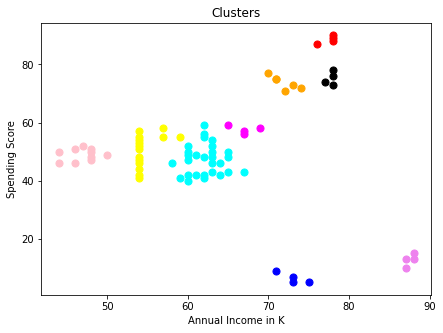

In [14]:
plt.figure(figsize=(7,5))
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(X[y_means == 5, 0], X[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(X[y_means == 6, 0], X[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(X[y_means == 7, 0], X[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(X[y_means == 8, 0], X[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Annual Income in K')
plt.ylabel('Spending Score')
plt.title('Clusters')
plt.show()